# Imports

In [1]:
import pandas as pd
from utils import group_experiment_by_amount
import matplotlib.pyplot as plt
import seaborn as sns

# Find best Learning Rate

In [2]:
all_lrs = pd.DataFrame(columns=['lr', 'SD MAE (clipcount)', 'Ours MAE (clipcount)', 'SD MAE (YOLO)', 'Ours MAE (YOLO)', 'SD CLIP', 'Ours CLIP'])
lrs = [0.00025, 0.00125, 0.01, 0.05, 0.1]

for lr in lrs:
    curr = pd.read_pickle(f"../experiments/lr/experiment_{str(lr)[2:]}lr.pkl")
    curr = curr[curr['is_clipcount'] == True]
    all_lrs = pd.concat([all_lrs, pd.DataFrame
    ([
        {
            "lr" : lr,
            'SD MAE (clipcount)' : curr['sd_count_diff'].mean(),
            'Ours MAE (clipcount)' : curr['sd_optimized_count_diff'].mean(),
            'SD MAE (YOLO)' : curr[curr['is_yolo'] == True]['sd_count_diff2'].mean(),
            'Ours MAE (YOLO)' : curr[curr['is_yolo'] == True]['sd_optimized_count_diff2'].mean(),
            'SD CLIP' : 1-curr['actual_relevance_score'].mean(),
            'Ours CLIP' : 1-curr['optimized_relevance_score'].mean()
        }
    ])], ignore_index=True)
    
all_lrs

C:\Users\ozzafar\AppData\Local\Temp\ipykernel_48388\1012232712.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_lrs = pd.concat([all_lrs, pd.DataFrame


,lr,SD MAE (clipcount),Ours MAE (clipcount),SD MAE (YOLO),Ours MAE (YOLO),SD CLIP,Ours CLIP
0,0.00025,21.358131,16.590973,15.282051,15.102564,0.705159,0.704340
1,0.00125,21.681614,10.087102,15.282051,13.230769,0.706907,0.705577
2,0.01000,22.110869,6.664971,15.282051,10.743590,0.704704,0.704778
3,0.05000,22.070056,5.242243,15.282051,12.615385,0.704478,0.703470
4,0.10000,21.524450,5.171116,15.282051,11.589744,0.704102,0.703690


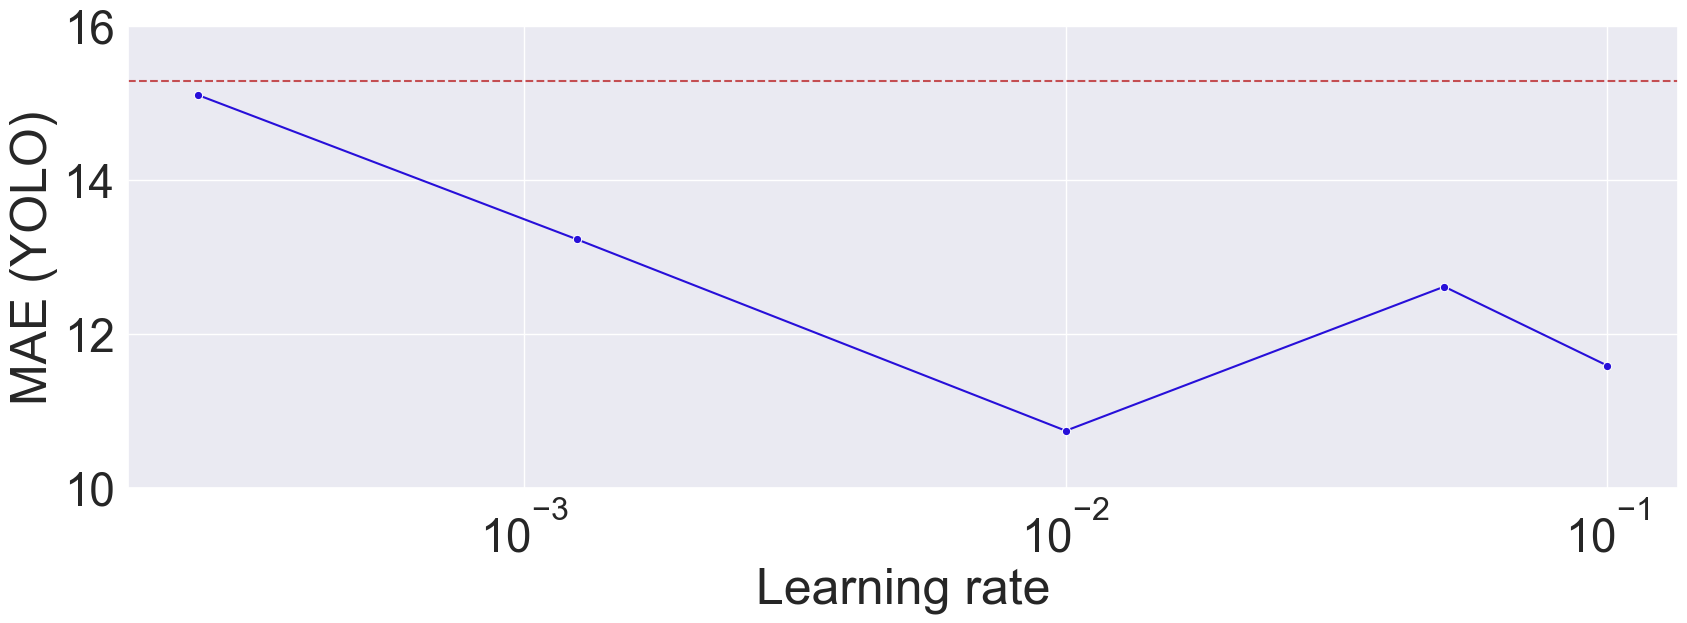

In [39]:
ours_maes = []
sd_mae = None

for i, lr in enumerate(lrs):
    df = all_lrs.loc[i]
    ours_maes.append(df['Ours MAE (YOLO)'].mean())
    sd_mae = df['SD MAE (YOLO)'].mean()

plt.figure(figsize=(20, 6))
plt.xlabel('Learning rate')
plt.ylabel('MAE (YOLO)')
# plt.title('Learning rate vs MAE')

# Create a scatter plot
sns.set(style="whitegrid", font_scale=3)
sns_plot = sns.lineplot(x=lrs, y=ours_maes, marker='o', linestyle='-', color='#270fd9')
sns_plot.set_xscale('log')
sns_plot.set_ylim(10, 16)

plt.axhline(y=sd_mae, color='r', linestyle='--')

# Show the plot
plt.savefig('../figures/lr_vs_mae.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
best_lr_index = all_lrs["Ours MAE (YOLO)"].idxmin()
best_lr = lrs[best_lr_index]
best_lr

0.01

In [5]:
best_lr_df = pd.read_pickle(f"../experiments/lr/experiment_{str(best_lr)[2:]}lr.pkl")
best_lr_df = best_lr_df[best_lr_df['is_clipcount'] == True]
group_experiment_by_amount(best_lr_df)

,amount,SD MAE (clipcount),Ours MAE (clipcount),SD MAE (YOLO),Ours MAE (YOLO),SD CLIP,Ours CLIP
0,5,11.134555,4.616883,4.384615,4.153846,0.701925,0.700651
1,15,23.757216,5.755914,18.538462,13.076923,0.706844,0.705809
2,25,31.544502,9.654973,22.923077,15.0,0.705349,0.707909


# Find best lambda

In [6]:
all_lambdas = pd.DataFrame(columns=['lambda', 'SD MAE (clipcount)', 'Ours MAE (clipcount)', 'SD MAE (YOLO)', 'Ours MAE (YOLO)', 'SD CLIP', 'Ours CLIP'])
lambdas = [0, 5, 25, 100]

for _lambda in lambdas:
    curr = pd.read_pickle(f"../experiments/lambda/experiment_{_lambda}lambda{str(best_lr)[2:]}lr.pkl")
    curr = curr[curr['is_clipcount'] == True]
    all_lambdas = pd.concat([all_lambdas, pd.DataFrame
    ([
        {
            "lambda" : _lambda,
            'SD MAE (clipcount)' : curr['sd_count_diff'].mean(),
            'Ours MAE (clipcount)' : curr['sd_optimized_count_diff'].mean(),
            'SD MAE (YOLO)' : curr[curr['is_yolo'] == True]['sd_count_diff2'].mean(),
            'Ours MAE (YOLO)' : curr[curr['is_yolo'] == True]['sd_optimized_count_diff2'].mean(),
            'SD CLIP' : 1-curr['actual_relevance_score'].mean(),
            'Ours CLIP' : 1-curr['optimized_relevance_score'].mean()
        }
    ])], ignore_index=True)
    
all_lambdas

C:\Users\ozzafar\AppData\Local\Temp\ipykernel_48388\938792668.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_lambdas = pd.concat([all_lambdas, pd.DataFrame


,lambda,SD MAE (clipcount),Ours MAE (clipcount),SD MAE (YOLO),Ours MAE (YOLO),SD CLIP,Ours CLIP
0,0,21.409582,6.091541,15.282051,12.589744,0.706393,0.705208
1,5,21.590128,5.584012,15.282051,11.230769,0.706846,0.705183
2,25,21.315139,5.704018,15.282051,11.871795,0.705355,0.704143
3,100,21.409582,5.990197,15.282051,12.282051,0.706393,0.703284


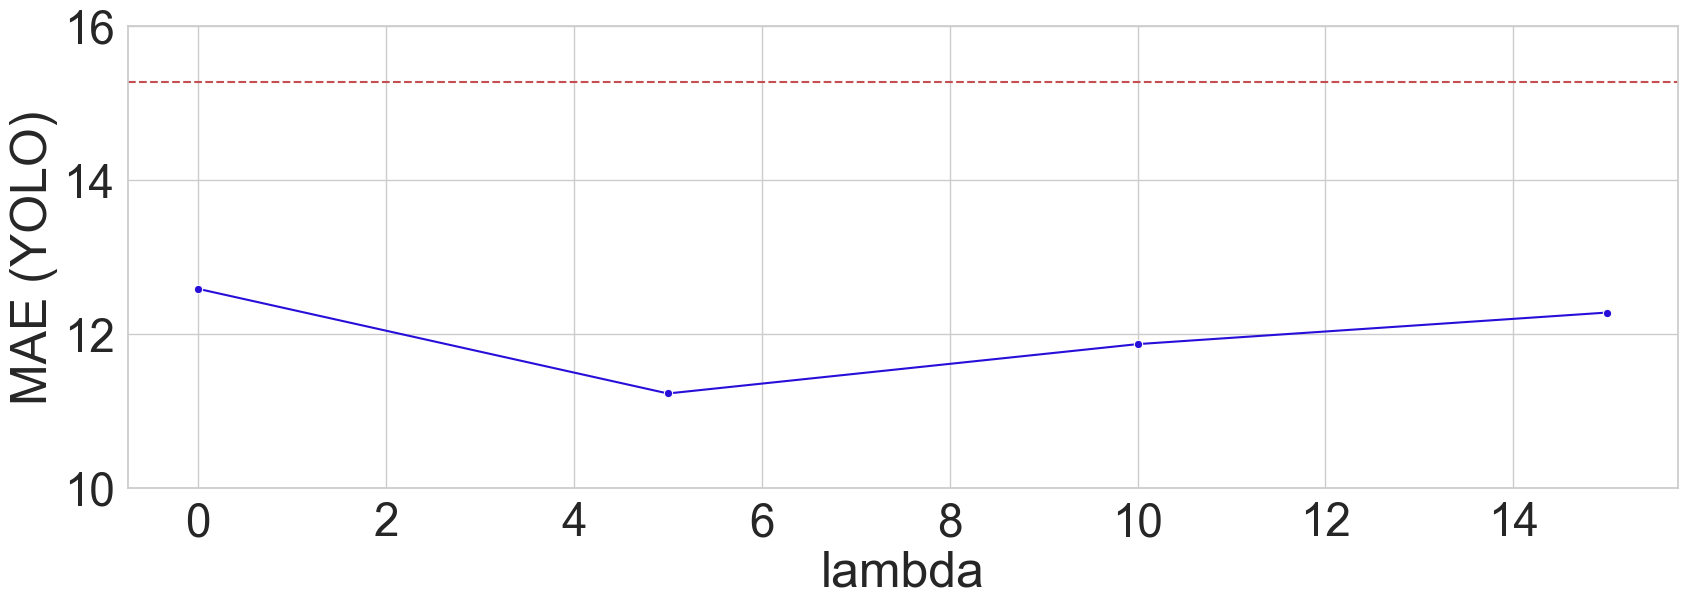

In [40]:
ours_maes = []
sd_mae = None

lambdas = [0, 5, 10, 15]
for i,_lambda in enumerate(lambdas):
    df = all_lambdas.loc[i]
    ours_maes.append(df['Ours MAE (YOLO)'].mean())
    sd_mae = df['SD MAE (YOLO)'].mean()

plt.figure(figsize=(20, 6))
plt.xlabel('lambda')
plt.ylabel('MAE (YOLO)')
# plt.title('Learning rate vs MAE')

# Create a scatter plot
sns.set(style="whitegrid", font_scale=3)
sns_plot = sns.lineplot(x=lambdas, y=ours_maes, marker='o', linestyle='-', color='#270fd9')
sns_plot.set_ylim(10, 16)
# sns_plot.set_xscale('log')

plt.axhline(y=sd_mae, color='r', linestyle='--')

# Show the plot
plt.savefig('../figures/lambda_vs_mae.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
best_lambda_index = all_lambdas["Ours MAE (YOLO)"].idxmin()
best_lambda = lambdas[best_lambda_index]
best_lambda

5

In [9]:
best_lambda_df = pd.read_pickle(f"../experiments/lambda/experiment_{best_lambda}lambda{str(best_lr)[2:]}lr.pkl")
best_lambda_df = best_lambda_df[best_lambda_df['is_clipcount'] == True]

group_experiment_by_amount(best_lambda_df)

,amount,SD MAE (clipcount),Ours MAE (clipcount),SD MAE (YOLO),Ours MAE (YOLO),SD CLIP,Ours CLIP
0,5,9.592247,4.918367,4.384615,3.384615,0.703157,0.700211
1,15,23.035197,5.362774,18.538462,16.923077,0.709599,0.705943
2,25,32.271633,6.481712,22.923077,13.384615,0.707795,0.709448


# Explore best lambda

### 1. Compare with Baselines

In [10]:
# ControlNet
controlnet = pd.read_pickle(f"../experiments/experiment_controlnet_1.pkl")
controlnet = controlnet[controlnet['is_clipcount'] == True]

# dynamic scale factor
dynamic_scale = pd.read_pickle(f"../experiments/dynamic_scale_factor/experiment_dynamic_scale_factor_thresh_03.pkl") # same learning rate, 0 lambda
dynamic_scale = dynamic_scale[dynamic_scale['is_clipcount'] == True]
dynamic_scale = dynamic_scale[dynamic_scale['is_yolo'] == True]
# dynamic_scale = dynamic_scale[dynamic_scale['class'] != "bowl"] # outlier

sd_mae_clipcount = best_lambda_df['sd_count_diff'].mean()
controlnet_mae_clipcount = controlnet['sd_optimized_count_diff'].mean()
ours_mae_clipcount = best_lambda_df['sd_optimized_count_diff'].mean()
dynamic_scale_mae_clipcount = dynamic_scale['sd_optimized_count_diff'].mean()

sd_mae_yolo = best_lambda_df[best_lambda_df['is_yolo']==True]['sd_count_diff2'].mean()
controlnet_mae_yolo = controlnet[controlnet['is_yolo']==True]['sd_optimized_count_diff2'].mean()
ours_mae_yolo = best_lambda_df[best_lambda_df['is_yolo']==True]['sd_optimized_count_diff2'].mean()
dynamic_scale_mae_yolo = dynamic_scale[dynamic_scale['is_yolo']==True]['sd_optimized_count_diff2'].mean()

sd_clip = 1-best_lambda_df['actual_relevance_score'].mean()
controlnet_clip = 1-controlnet['optimized_relevance_score'].mean()
ours_mae_clip = 1-best_lambda_df['optimized_relevance_score'].mean()
dynamic_scale_mae_clip = 1-dynamic_scale['optimized_relevance_score'].mean()

data = {
    'MAE (clipcount)': [sd_mae_clipcount, controlnet_mae_clipcount, ours_mae_clipcount, dynamic_scale_mae_clipcount],
    'MAE (YOLO)': [sd_mae_yolo, controlnet_mae_yolo, ours_mae_yolo, dynamic_scale_mae_yolo],
    'RMSE (clipcount)': [sd_mae_clipcount, controlnet_mae_clipcount, ours_mae_clipcount, dynamic_scale_mae_clipcount],
    'RMSE (YOLO)': [sd_mae_yolo, controlnet_mae_yolo, ours_mae_yolo, dynamic_scale_mae_yolo],
    'CLIP': [sd_clip, controlnet_clip, ours_mae_clip, dynamic_scale_mae_clip]
}

pd.DataFrame(data, index=['SD', 'ControlNet', 'Ours', 'Ours (dynamic scale)'])

,MAE (clipcount),MAE (YOLO),RMSE (clipcount),RMSE (YOLO),CLIP
SD,21.590128,15.282051,21.590128,15.282051,0.706846
ControlNet,9.812914,15.000000,9.812914,15.000000,0.720257
Ours,5.584012,11.230769,5.584012,11.230769,0.705183
Ours (dynamic scale),15.382917,6.977778,15.382917,6.977778,0.702029


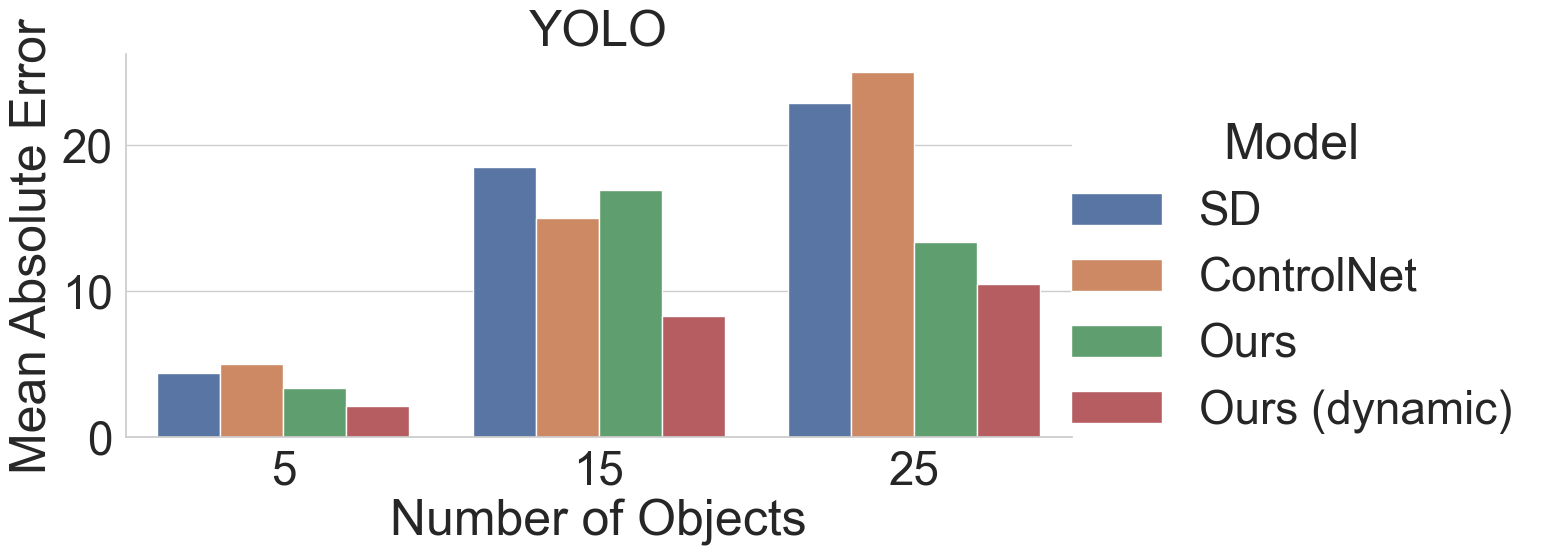

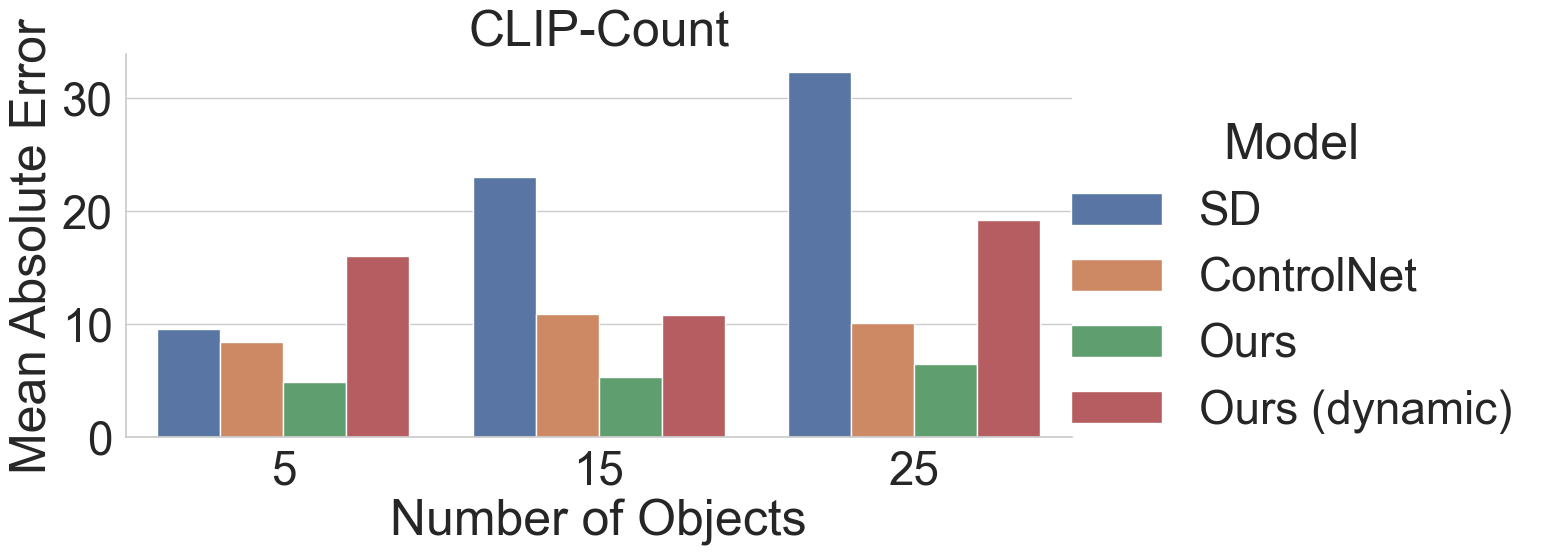

In [38]:
import itertools

grouped_sd = group_experiment_by_amount(best_lambda_df)
grouped_sd['Ours MAE (clipcount)'] = grouped_sd['SD MAE (clipcount)']
grouped_sd['Ours MAE (YOLO)'] = grouped_sd['SD MAE (YOLO)']
grouped_best_lambda_df = group_experiment_by_amount(best_lambda_df)
grouped_controlnet= group_experiment_by_amount(controlnet)
grouped_dynamic_scale= group_experiment_by_amount(dynamic_scale)

df = pd.concat([grouped_sd, grouped_controlnet, grouped_best_lambda_df, grouped_dynamic_scale], ignore_index=True)

amounts = [5,15,25]

# YOLO

data = {
    'Number of Objects': list(itertools.chain.from_iterable([4*[amount] for amount in amounts])),
    'Model': ['SD' , 'ControlNet', 'Ours', 'Ours (dynamic)'] * 3,
    'Mean Absolute Error':  df.sort_values(by='amount', kind='mergesort')['Ours MAE (YOLO)']
}

df_yolo = pd.DataFrame(data)

sns.set(style="whitegrid", font_scale=3)
sns.catplot(
    x='Number of Objects', 
    y='Mean Absolute Error', 
    hue='Model', 
    data=df_yolo, 
    kind='bar', 
    height=6, 
    aspect=2
)

plt.title('YOLO')
plt.savefig('../figures/bar_plot_yolo2.pdf', dpi=300, bbox_inches='tight')
plt.show()

# CLIP-Count

data = {
    'Number of Objects': list(itertools.chain.from_iterable([4*[amount] for amount in amounts])),
    'Model': ['SD' , 'ControlNet', 'Ours', 'Ours (dynamic)'] * 3,
    'Mean Absolute Error':  df.sort_values(by='amount', kind='mergesort')['Ours MAE (clipcount)']
}

df_clipcount = pd.DataFrame(data)

sns.set(style="whitegrid", font_scale=3)
sns.catplot(
    x='Number of Objects', 
    y='Mean Absolute Error', 
    hue='Model', 
    data=df_clipcount, 
    kind='bar', 
    height=6, 
    aspect=2
)

plt.title('CLIP-Count')
plt.savefig('../figures/bar_plot_clipcount2.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Compare to standard SDXL with different number of diffusion steps

In [12]:
all_steps = pd.DataFrame(columns=['steps', 'SD (clipcount) MAE', 'Ours (clipcount) MAE', 'SD (yolo) MAE', 'Ours (yolo) MAE', 'SD (CLIP)', 'Ours (CLIP)'])

for step in range(1,5):
    curr = pd.read_pickle(f"../experiments/token_reuse/experiment_{best_lambda}lambda{str(best_lr)[2:]}lr-eval-{step}.pkl")
    curr = curr[curr['is_clipcount'] == True]
    all_steps = pd.concat([all_steps, pd.DataFrame
    ([
        {
            "steps" : step,
            'SD (clipcount) MAE' : curr['sd_count_diff'].mean(),
            'Ours (clipcount) MAE' : curr['sd_optimized_count_diff'].mean(),
            'SD (yolo) MAE' : curr[curr['is_yolo'] == True]['sd_count_diff2'].mean(),
            'Ours (yolo) MAE' : curr[curr['is_yolo'] == True]['sd_optimized_count_diff2'].mean(),
            'SD (CLIP)' : 1-curr['actual_relevance_score'].mean(),
            'Ours (CLIP)' : 1-curr['optimized_relevance_score'].mean()
        }
    ])], ignore_index=True)
    
all_steps

C:\Users\ozzafar\AppData\Local\Temp\ipykernel_48388\969790798.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_steps = pd.concat([all_steps, pd.DataFrame


,steps,SD (clipcount) MAE,Ours (clipcount) MAE,SD (yolo) MAE,Ours (yolo) MAE,SD (CLIP),Ours (CLIP)
0,1,22.563755,5.596906,14.923077,11.230769,0.707426,0.705112
1,2,15.722917,6.610024,14.307692,12.615385,0.705697,0.705143
2,3,14.901099,7.136169,13.564103,12.205128,0.709214,0.707731
3,4,14.458994,7.712382,13.538462,11.461538,0.710098,0.708994


## Large Experiment (1-25)

In [13]:
from math import sqrt

# baslines
controlnet_large = pd.read_pickle(f"../experiments/large/experiment_controlnet_1_large.pkl")
ours_large = pd.read_pickle(f"../experiments/large/experiment_5lambda01lr_large.pkl")
dynamic_scale_large = pd.read_pickle(f"../experiments/large/experiment_dynamic_scale_factor_03thresh5lambda01lr_large.pkl")
dynamic_scale_large=dynamic_scale_large[dynamic_scale_large['amount']>0]

sd_mae_clipcount = ours_large['sd_count_diff'].mean()
controlnet_mae_clipcount = controlnet_large['sd_optimized_count_diff'].mean()
ours_mae_clipcount = ours_large['sd_optimized_count_diff'].mean()
dynamic_scale_mae_clipcount = dynamic_scale_large['sd_optimized_count_diff'].mean()

sd_mae_yolo = ours_large['sd_count_diff2'].mean()
controlnet_mae_yolo = controlnet_large['sd_optimized_count_diff2'].mean()
ours_mae_yolo = ours_large['sd_optimized_count_diff2'].mean()
dynamic_scale_mae_yolo = dynamic_scale_large['sd_optimized_count_diff2'].mean()

sd_rmse_clipcount = sqrt((ours_large['sd_count_diff'] ** 2).mean())
controlnet_rmse_clipcount = sqrt((controlnet_large['sd_optimized_count_diff'] ** 2).mean())
ours_rmse_clipcount = sqrt((ours_large['sd_optimized_count_diff'] ** 2).mean())
dynamic_scale_rmse_clipcount = sqrt((dynamic_scale_large['sd_optimized_count_diff'] ** 2).mean())

sd_rmse_yolo = sqrt((ours_large[ours_large['is_yolo']==True]['sd_count_diff2'] ** 2).mean())
controlnet_rmse_yolo = sqrt((controlnet_large[controlnet_large['is_yolo']==True]['sd_optimized_count_diff2'] ** 2).mean())
ours_rmse_yolo = sqrt((ours_large[ours_large['is_yolo']==True]['sd_optimized_count_diff2'] ** 2).mean())
dynamic_scale_rmse_yolo = sqrt((dynamic_scale_large[dynamic_scale_large['is_yolo']==True]['sd_optimized_count_diff2'] ** 2).mean())

sd_clip = 1-ours_large['actual_relevance_score'].mean()
controlnet_clip = 1-controlnet_large['optimized_relevance_score'].mean()
ours_mae_clip = 1-ours_large['optimized_relevance_score'].mean()
dynamic_scale_mae_clip = 1-dynamic_scale_large['optimized_relevance_score'].mean()

data = {
    'MAE (clipcount)': [sd_mae_clipcount, controlnet_mae_clipcount, ours_mae_clipcount, dynamic_scale_mae_clipcount],
    'MAE (YOLO)': [sd_mae_yolo, controlnet_mae_yolo, ours_mae_yolo, dynamic_scale_mae_yolo],
    'RMSE (clipcount)': [sd_rmse_clipcount, controlnet_rmse_clipcount, ours_rmse_clipcount, dynamic_scale_rmse_clipcount],
    'RMSE (YOLO)': [sd_rmse_yolo, controlnet_rmse_yolo, ours_rmse_yolo, dynamic_scale_rmse_yolo],
    'CLIP': [sd_clip, controlnet_clip, ours_mae_clip, dynamic_scale_mae_clip]
}

pd.DataFrame(data, index=['SD', 'ControlNet', 'Ours', 'Ours (dynamic scale)'])

,MAE (clipcount),MAE (YOLO),RMSE (clipcount),RMSE (YOLO),CLIP
SD,15.609307,14.935622,25.207432,20.315009,0.704244
ControlNet,7.870424,12.064000,13.779611,15.704522,0.710510
Ours,4.135794,11.366953,6.725404,16.420899,0.702840
Ours (dynamic scale),9.346841,7.726477,15.783145,12.211932,0.699089


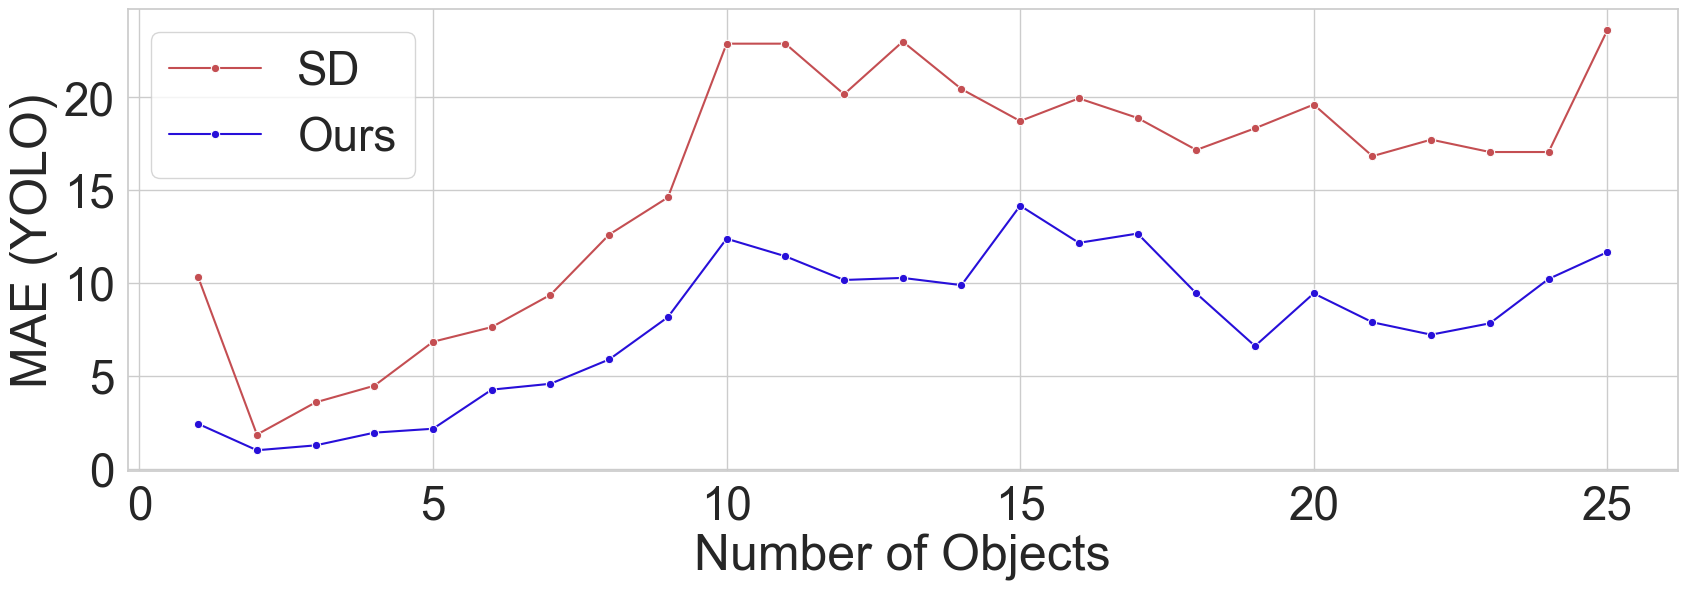

In [41]:
amounts = dynamic_scale_large['amount'].unique()
maes_sd = dynamic_scale_large.groupby('amount').agg({'sd_count_diff2': 'mean'})['sd_count_diff2']
maes_ours = dynamic_scale_large.groupby('amount').agg({'sd_optimized_count_diff2': 'mean'})['sd_optimized_count_diff2']

plt.figure(figsize=(20, 6))
plt.xlabel('Number of Objects')
plt.ylabel('MAE (YOLO)')
# plt.title('Amount vs MAE')
sns.set(style="whitegrid", font_scale=3)

# Create a scatter plot
sns.scatterplot(x=amounts, y=maes_sd)
sns.scatterplot(x=amounts, y=maes_ours)
sns.lineplot(x=amounts, y=maes_sd, marker='o', linestyle='-', label='SD', color='r')
sns.lineplot(x=amounts, y=maes_ours, marker='o', linestyle='-', label='Ours', color='#270fd9')

# Add labels and title

# Show the plot
plt.savefig('../figures/amount_vs_mae.png', dpi=300, bbox_inches='tight')
plt.show()